# Preparation

In [145]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from os import listdir

pd.set_option('display.max_columns',100)

listdir('./datasets/')

['players.csv', 'results.csv']

In [146]:
base_dir = './datasets/'

results_df = pd.read_csv(base_dir+'results.csv',low_memory=False)
players_df = pd.read_csv(base_dir+'players.csv',low_memory=False)

In [147]:
results_df.head()

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,2020-03-18,Recon 5,TeamOne,Dust2,0,16,2,2,0,1,0,15,5151,2340454,62,63,0,2,2
1,2020-03-18,Recon 5,TeamOne,Inferno,13,16,2,2,8,6,5,10,5151,2340454,62,63,0,2,2
2,2020-03-18,New England Whalers,Station7,Inferno,12,16,2,1,9,6,3,10,5243,2340461,140,118,12,16,2
3,2020-03-18,Rugratz,Bad News Bears,Inferno,7,16,2,2,0,8,7,8,5151,2340453,61,38,0,2,2
4,2020-03-18,Rugratz,Bad News Bears,Vertigo,8,16,2,2,4,5,4,11,5151,2340453,61,38,0,2,2


In [148]:
players_df.head()

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,map_1,map_2,map_3,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating,m1_kills,m1_assists,m1_deaths,m1_hs,m1_flash_assists,m1_kast,m1_kddiff,m1_adr,m1_fkdiff,m1_rating,m2_kills,m2_assists,m2_deaths,m2_hs,m2_flash_assists,m2_kast,m2_kddiff,m2_adr,m2_fkdiff,m2_rating,m3_kills,m3_assists,m3_deaths,m3_hs,m3_flash_assists,m3_kast,m3_kddiff,...,m3_fkdiff,m3_rating,kills_ct,deaths_ct,kddiff_ct,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,m1_kills_ct,m1_deaths_ct,m1_kddiff_ct,m1_adr_ct,m1_kast_ct,m1_rating_ct,m1_kills_t,m1_deaths_t,m1_kddiff_t,m1_adr_t,m1_kast_t,m1_rating_t,m2_kills_ct,m2_deaths_ct,m2_kddiff_ct,m2_adr_ct,m2_kast_ct,m2_rating_ct,m2_kills_t,m2_deaths_t,m2_kddiff_t,m2_adr_t,m2_kast_t,m2_rating_t,m3_kills_ct,m3_deaths_ct,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,57,14,61,29,0.0,71.1,-4,79.9,0,1.04,11,3,18,5,0.0,65.2,-7,60.8,-1,0.70,30.0,7.0,24.0,16.0,0.0,73.5,6.0,99.2,6.0,1.38,16.0,4.0,19.0,8.0,0.0,73.1,-3.0,...,-5.0,0.91,34.0,30.0,4.0,81.6,79.2,1.10,23.0,31.0,-8.0,77.5,60.0,0.97,8.0,10.0,-2.0,76.3,73.3,0.90,3.0,8.0,-5.0,31.9,50.0,0.34,17.0,10.0,7.0,93.7,83.3,1.41,13.0,14.0,-1.0,105.3,62.5,1.35,9.0,10.0,-1.0,72.5,80.0,0.93,7.0,9.0,-2.0,70.4,63.6,0.89
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,54,10,54,18,4.0,65.1,0,71.7,2,0.98,11,2,17,4,2.0,60.9,-6,68.9,-1,0.75,26.0,6.0,19.0,8.0,1.0,76.5,7.0,80.1,3.0,1.24,17.0,2.0,18.0,6.0,1.0,53.8,-1.0,...,0.0,0.87,37.0,25.0,12.0,77.4,72.9,1.16,17.0,29.0,-12.0,63.9,54.3,0.73,9.0,9.0,0.0,72.3,73.3,0.88,2.0,8.0,-6.0,62.4,37.5,0.50,15.0,6.0,9.0,79.8,88.9,1.45,11.0,13.0,-2.0,80.5,62.5,1.00,13.0,10.0,3.0,79.5,53.3,1.12,4.0,8.0,-4.0,40.7,54.5,0.53
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,55,10,51,28,1.0,67.5,4,77.9,1,1.08,15,3,12,9,0.0,69.6,3,77.0,3,1.32,24.0,3.0,24.0,14.0,0.0,64.7,0.0,72.9,-1.0,0.97,16.0,4.0,15.0,5.0,1.0,69.2,1.0,...,-1.0,1.04,31.0,17.0,14.0,96.6,71.4,1.39,24.0,34.0,-10.0,64.2,64.6,0.86,11.0,2.0,9.0,135.2,75.0,2.17,4.0,10.0,-6.0,45.9,66.7,0.87,13.0,9.0,4.0,87.6,75.0,1.26,11.0,15.0,-4.0,59.7,55.6,0.71,7.0,6.0,1.0,81.5,63.6,1.03,9.0,9.0,0.0,87.9,73.3,1.05
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,43,5,54,18,2.0,65.1,-11,58.7,-4,0.83,11,1,15,6,1.0,65.2,-4,60.7,-2,0.73,22.0,3.0,21.0,8.0,1.0,70.6,1.0,67.9,-2.0,1.00,10.0,1.0,18.0,4.0,0.0,57.7,-8.0,...,0.0,0.69,33.0,23.0,10.0,74.0,75.0,1.11,10.0,31.0,-21.0,37.8,51.4,0.43,9.0,8.0,1.0,68.3,73.3,0.92,2.0,7.0,-5.0,46.5,50.0,0.38,15.0,6.0,9.0,84.3,83.3,1.40,7.0,15.0,-8.0,49.3,56.2,0.55,9.0,9.0,0.0,67.2,66.7,0.97,1.0,9.0,-8.0,14.8,45.5,0.31
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,52,22,46,23,9.0,77.1,6,75.9,-1,1.08,10,5,12,3,3.0,65.2,-2,51.5,0,0.83,29.0,6.0,21.0,16.0,0.0,82.4,8.0,101.9,0.0,1.35,13.0,11.0,13.0,4.0,6.0,80.8,0.0,...,-1.0,0.98,28.0,17.0,11.0,96.3,85.7,1.36,24.0,29.0,-5.0,61.0,70.8,0.87,4.0,3.0,1.0,64.8,62.5,0.98,6.0,9.0,-3.0,44.4,66.7,0.75,19.0,8.0,11.0,128.1,100.0,1.88,10.0,13.0,-3.0,78.7,66.7,0.89,5.0,6.0,-1.0,72.9,81.8,0.96,8.0,7.0,1.0,56.3,80.0,0.99


This data includes all professional CSGO matches, including matches from relatively unknown teams. Therefore, we will be limiting the datasets to just the top 30 teams.

In [149]:
min_rank = 30
results_df = results_df[(results_df.rank_1<min_rank)&(results_df.rank_2<min_rank)]
players_df   = players_df[players_df.match_id.isin(results_df.match_id.unique())]

# Results DF

Our first analysis would be to check the distribution of scores in each game. First we separate the winners and losers to group them accordingly.

In [150]:
winner_1 = results_df[results_df.result_1>=results_df.result_2].result_1.values
loser_1  = results_df[results_df.result_1>=results_df.result_2].result_2.values

winner_2 = results_df[results_df.result_1<results_df.result_2].result_2.values
loser_2  = results_df[results_df.result_1<results_df.result_2].result_1.values

winner = np.concatenate((winner_1,winner_2))
loser = np.concatenate((loser_1,loser_2))
scores_df = pd.DataFrame(np.vstack((winner,loser)).T,columns=['winner','loser'])

In [151]:
gb = scores_df.groupby(by=['winner','loser'])['winner'].count()/scores_df.shape[0]
overtime_percentage = str(round(gb[gb.index.get_level_values(0)!=16].sum()*100,1))+'%'

gb = round(gb[gb>10**-3]*100,1)

index_plot = np.array(gb.index.get_level_values(0).astype('str'))+'-'+np.array(
    gb.index.get_level_values(1).astype('str'))

fig = go.Figure()
fig.add_trace(go.Scatter(x=index_plot,y=gb.values, name='results'))
fig.update_layout(xaxis_type='category',title='Scores distribution',xaxis_title='Score',yaxis_title='Percentage of matches (%)')

In [152]:
overtime_percentage

'9.7%'

As we can see, the most common score is 16-14, with 9.7% of matches going to overtime.

#### The most CT sided map

There has always been controversy surrounding the biasness of maps. Having a one-sided map is argued to present a psychological advantage or vice versa, and thus it is often debated as to whether it is a favourable outcome. Below, we will compute the average scores and compare both sides.

In [153]:
#extracting ct side
ct_1 = results_df[['date','_map','ct_1']].rename(columns={'ct_1':'ct'})
ct_2 = results_df[['date','_map','ct_2']].rename(columns={'ct_2':'ct'})
ct = pd.concat((ct_1,ct_2))

#extracting t side
t_1 = results_df[['date','_map','t_1']].rename(columns={'t_1':'t'})
t_2 = results_df[['date','_map','t_2']].rename(columns={'t_2':'t'})
t = pd.concat((t_1,t_2))

t = t.sort_values('date')
ct = ct.sort_values('date')

#Ancient and Anubis are not present in the dataset, although they are in the current map pool
maps = ['Cache', 'Dust2','Inferno','Mirage','Nuke','Overpass','Train','Vertigo']

In [154]:
#creates a dictionary to store the data for each separate map
series_t, series_ct, how_ct = {},{},{}
for i, key in enumerate(maps):
    t_map = t[t._map == maps[i]]
    ct_map = ct[ct._map == maps[i]]
    y_t = t_map.t.rolling(min_periods = 20, window= 200, center=True).sum().values
    y_ct = ct_map.ct.rolling(min_periods = 20, window= 200, center=True).sum().values
    
    series_t[key] = pd.Series(data=y_t,index=t_map.date)
    series_ct[key] = pd.Series(data=y_ct,index=ct_map.date)
    
    how_ct[key] = series_ct[key]/(series_ct[key]+series_t[key])//0.001/10


def add_trace(_map):
    fig.add_trace(go.Scatter(x=how_ct[_map].index, y=how_ct[_map].values, name=_map))


fig = go.Figure()
for _map in maps:
    add_trace(_map)
#add benchmark 50%
fig.add_trace(go.Scatter(x=['2015-11-01', '2020-03-12'], y=[50,50],
                         mode='lines',line=dict(color='grey'),showlegend=False))
fig.update_layout(title='Distribution of rounds between CT and T sides',
                  yaxis_title='Percentage of round won on the CT-side (%)')
fig.show()

In [155]:
# Calculate CT-sidedness for each map
ct_sidedness = {map_name: ct_ratio.mean() for map_name, ct_ratio in how_ct.items()}

# # Find the most CT-sided map
# most_ct_sided_map_rankings = ct_sidedness, key=ct_sidedness.get

# # Print the result
# for i in most_ct_sided_map_rankings:
#     print(f"Most CT-sided map rankings: {map_name} with a CT-sidedness score of {ct_sidedness[i]}")

# Sort the dictionary by values (CT-sidedness percentages)
sorted_ct_sidedness = sorted(ct_sidedness.items(), key=lambda x: x[1], reverse=True)

for rank, (map_name, ct_ratio) in enumerate(sorted_ct_sidedness, start=1):
    print(f"Rank {rank}: Map: {map_name}, CT-sidedness Percentage: {ct_ratio}")

Rank 1: Map: Nuke, CT-sidedness Percentage: 55.98246666666667
Rank 2: Map: Train, CT-sidedness Percentage: 54.600830924855494
Rank 3: Map: Mirage, CT-sidedness Percentage: 52.419449598021025
Rank 4: Map: Overpass, CT-sidedness Percentage: 52.374
Rank 5: Map: Inferno, CT-sidedness Percentage: 50.335962264150936
Rank 6: Map: Vertigo, CT-sidedness Percentage: 48.68080808080808
Rank 7: Map: Dust2, CT-sidedness Percentage: 48.532399103139014
Rank 8: Map: Cache, CT-sidedness Percentage: 47.021055555555556


In [156]:
print('Total number of matches played on the map:')
results_df.groupby('_map').date.count()

Total number of matches played on the map:


_map
Cache           900
Cobblestone     898
Default           2
Dust2           892
Inferno        1325
Mirage         1617
Nuke            750
Overpass       1150
Train          1384
Vertigo          99
Name: date, dtype: int64

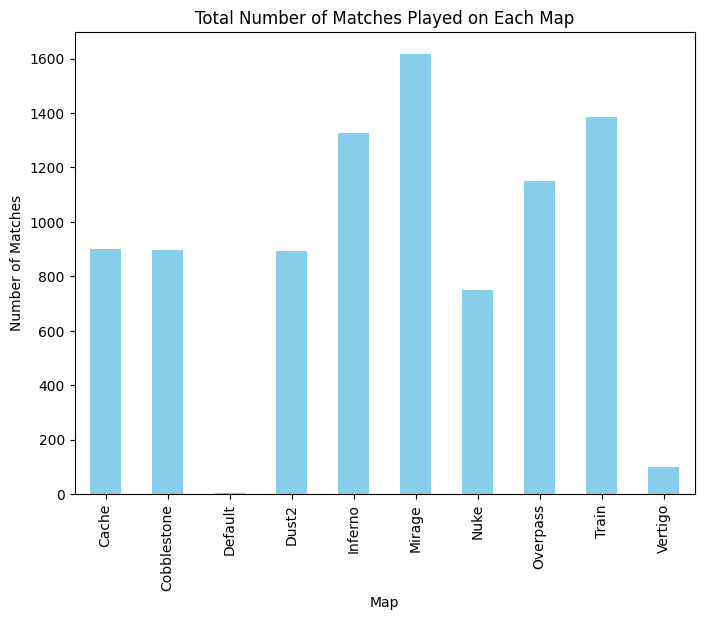

In [157]:
import matplotlib.pyplot as plt
import pandas as pd

# Grouping by map and counting matches
map_counts = results_df.groupby('_map').date.count()

# Plotting the graph
map_counts.plot(kind='bar', figsize=(8, 6), color='skyblue')

# Setting the title and labels
plt.title('Total Number of Matches Played on Each Map')
plt.xlabel('Map')
plt.ylabel('Number of Matches')

# Displaying the plot
plt.show()

# Majors Analysis

In the realm of CS:GO, the prestigious competitions are the Majors, typically held biannually with a substantial $1,000,000 prize pool. You can find additional details about Majors on this page: https://liquipedia.net/counterstrike/Majors

Moving forward, we'll segment the 'date' column in a dataframe into a new column called 'time_period'. This new column will indicate the most recently concluded major tournament.

In [158]:
majors = [{'tournament':'01. Cluj-Napoca 2015','start_date':'2015-10-28'},
          {'tournament':'02. Columbus 2016','start_date':'2016-03-29'},
          {'tournament':'03. Cologne 2016','start_date':'2016-07-05'},
          {'tournament':'04. Atlanta 2017','start_date':'2017-01-22'},
          {'tournament':'05. Krakow 2017','start_date':'2017-07-16'},
          {'tournament':'06. Boston 2018','start_date':'2018-01-26'},
          {'tournament':'07. London 2018','start_date':'2018-09-20'},
          {'tournament':'08. Katowice 2019','start_date':'2019-02-28'},
          {'tournament':'09. Berlin 2019','start_date':'2019-09-05'}]

In [159]:
def create_col_time_period(df):
    df['time_period'] = ''
    
    for major_start in majors:
        df.loc[(df['date']>=major_start['start_date']),'time_period'] = major_start['tournament']
    
    return df

results_df = create_col_time_period(results_df)
players_df = players_df.merge(results_df[['match_id','time_period']],'left',on='match_id')

results_df_team_1 = results_df[['time_period','team_1','_map','ct_1','t_2','ct_2','t_1']
                      ].rename(columns={'team_1':'team'})
results_df_team_2 = results_df[['time_period','team_2','_map','ct_1','t_2','ct_2','t_1']
                      ].rename(columns={'team_2':'team'})
results_df_teams = pd.concat((results_df_team_1,results_df_team_2))[['time_period','team','_map']]

gb = results_df_teams.groupby(['time_period','_map']).team.count()
gb_text = round(gb*100/gb.groupby('time_period').sum(),1).reset_index().rename(columns={'team':'percentage'})
gb_text.percentage = gb_text.percentage.astype(str)+'%'
gb = gb.reset_index()

fig = go.Figure()
for _map in maps:
    fig.add_bar(name=_map,x=gb[gb._map==_map].time_period,y=gb[gb._map==_map].team,
                text=gb_text[gb_text._map==_map].percentage,textposition='inside')

fig.update_layout(barmode='stack',legend=dict(traceorder='normal'),yaxis_title='Number of maps played',font=dict(size=10))
fig.show()

Previously noted, historically, Nuke has been the least favored map among players. However, there has been a shift in recent times, with teams who once avoided Nuke now opting to ban maps like Vertigo instead.

Vertigo, being the newest and most unconventional addition to the map pool, remains the least popular. This could be attributed to its frequent alterations during its brief competitive tenure.

The time span between Columbus and Cologne 2016 witnessed the fewest maps played within a period of less than 4 months. Conversely, the period spanning from Boston to London 2018 saw the highest number of maps played over a duration exceeding 7 months.

# Best Teams on Each Map

In [160]:
results_df_team_1_ct = results_df_team_1.rename(columns={'ct_1':'ct_team','t_2':'t_opponent'}).drop(columns=['ct_2','t_1'])
results_df_team_2_ct = results_df_team_2.rename(columns={'ct_2':'ct_team','t_1':'t_opponent'}).drop(columns=['ct_1','t_2'])
results_df_ct = pd.concat((results_df_team_1_ct,results_df_team_2_ct),sort=True)

results_df_team_1_t = results_df_team_1.rename(columns={'t_1':'t_team','ct_2':'ct_opponent'}).drop(columns=['ct_1','t_2'])
results_df_team_2_t = results_df_team_2.rename(columns={'t_2':'t_team','ct_1':'ct_opponent'}).drop(columns=['ct_2','t_1'])
results_df_t = pd.concat((results_df_team_1_t,results_df_team_2_t),sort=True)

In [161]:
results_df_ct['side_diff'] = results_df_ct['ct_team']-results_df_ct['t_opponent']
results_df_ct['side_sum'] = results_df_ct['ct_team']+results_df_ct['t_opponent']

results_df_t['side_diff'] = results_df_t['t_team']-results_df_t['ct_opponent']
results_df_t['side_sum']  = results_df_t['t_team'] +results_df_t['ct_opponent']

results_df_ct.head()

,_map,ct_team,t_opponent,team,time_period,side_diff,side_sum
9,Mirage,9,6,fnatic,09. Berlin 2019,3,15
21,Overpass,4,4,fnatic,09. Berlin 2019,0,8
22,Nuke,7,8,Natus Vincere,09. Berlin 2019,-1,15
23,Dust2,5,10,Natus Vincere,09. Berlin 2019,-5,15
24,Train,3,7,forZe,09. Berlin 2019,-4,10


In [162]:
def groupby_time_map_team(results_df_side, majors):
    gb = results_df_side.groupby(['time_period','_map','team'])[['side_diff','side_sum']].sum()
    gb['side_diff_per_game'] = (gb['side_diff'] / gb['side_sum']) * 15
    gb = gb.sort_values(['time_period','_map','side_diff_per_game'], ascending=[1,1,0])

    for major in majors:
        col = major['tournament']
        _filter = gb.index.get_level_values(0) == col
        gb.loc[_filter] = gb.loc[_filter][gb.loc[_filter, 'side_sum'] > gb.loc[col, 'side_sum'].mean() * 3 / 4]

    gb.dropna(inplace=True)
    
    return gb


In [163]:
gb_ct = groupby_time_map_team(results_df_ct, majors)
gb_t = groupby_time_map_team(results_df_t, majors)

In [164]:
def plot_ranking_teams_sides(gb):
    rankings_teams = {}
    for _major in majors:
        col_major = _major['tournament']
        rankings_teams[col_major] = pd.DataFrame(index=range(1,6))
        rankings_teams[col_major].index.name = 'ranking'
        rankings_teams[col_major].style.set_caption(col_major)

        for _map in maps:
            try:
                top_5_teams = gb.loc[_major['tournament'], _map]['side_diff_per_game'][:5].index
                rankings_teams[col_major][_map] = top_5_teams
            except:
                pass

        print('\n' + col_major)
        display(rankings_teams[col_major])

# T side Ranking

In [165]:
print('T-side Rankings:\n')
plot_ranking_teams_sides(gb_t)

T-side Rankings:


01. Cluj-Napoca 2015


,Cache,Dust2,Inferno,Mirage,Overpass,Train
ranking,,,,,,
1,NiP,fnatic,Tempo Storm,TSM,TSM,NiP
2,fnatic,ENCE,OpTic,Dignitas,?,fnatic
3,Splyce,Cloud9,Astralis,Ancient,Astralis,Luminosity
4,Luminosity,mousesports,TSM,Astralis,fnatic,Vexed
5,Liquid,Liquid,Selfless,Renegades,HellRaisers,Natus Vincere



02. Columbus 2016


,Cache,Dust2,Inferno,Mirage,Overpass,Train
ranking,,,,,,
1,mousesports,Luminosity,FaZe,Astralis,G2,FaZe
2,Astralis,Natus Vincere,Luminosity,Dignitas,OpTic,fnatic
3,Renegades,CLG,Dignitas,TYLOO,NiP,Liquid
4,Liquid,Envy,Envy,CSGL,Astralis,Astralis
5,OpTic,Tempo Storm,mousesports,FaZe,HellRaisers,NiP



03. Cologne 2016


,Cache,Dust2,Mirage,Nuke,Overpass,Train
ranking,,,,,,
1,Envy,Renegades,TSM,NiP,Natus Vincere,Cloud9
2,Cloud9,Gambit,Kinguin,Liquid,NiP,SK
3,mousesports,Cloud9,Astralis,Virtus.pro,OpTic,OpTic
4,GODSENT,SK,Epsilon,Dignitas,FaZe,X
5,G2,Envy,Liquid,Echo Fox,Cloud9,Astralis



04. Atlanta 2017


,Cache,Inferno,Mirage,Nuke,Overpass,Train
ranking,,,,,,
1,FaZe,Immortals,SK,Gambit,Astralis,BIG
2,North,fnatic,GODSENT,Heroic,FlipSid3,Natus Vincere
3,fnatic,PENTA,CLG,FaZe,Kinguin,Liquid
4,SK,Cloud9,Astralis,North,Heroic,Gambit
5,G2,mousesports,HellRaisers,G2,Gambit,FaZe



05. Krakow 2017


,Cache,Inferno,Mirage,Nuke,Overpass,Train
ranking,,,,,,
1,Renegades,Natus Vincere,Gambit,mousesports,SK,Natus Vincere
2,Luminosity,Vega Squadron,mousesports,G2,Space Soldiers,FlipSid3
3,Space Soldiers,NRG,FaZe,Envy,FaZe,NiP
4,SK,FaZe,Cloud9,Virtus.pro,OpTic,OpTic
5,G2,fnatic,CLG,Astralis,North,Cloud9



06. Boston 2018


,Cache,Dust2,Inferno,Mirage,Nuke,Overpass,Train
ranking,,,,,,,
1,Liquid,HellRaisers,NiP,FaZe,Astralis,GODSENT,Natus Vincere
2,FaZe,Liquid,Natus Vincere,Imperial,Space Soldiers,NRG,NRG
3,TYLOO,North,Windigo,Natus Vincere,Natus Vincere,Astralis,Windigo
4,Gambit,FaZe,OpTic,North,Heroic,NiP,GODSENT
5,SK,mousesports,Envy,mousesports,Liquid,North,mousesports



07. London 2018


,Cache,Dust2,Inferno,Mirage,Nuke,Overpass,Train
ranking,,,,,,,
1,NiP,Liquid,Astralis,Natus Vincere,Astralis,Astralis,Renegades
2,Liquid,FaZe,NRG,OpTic,ENCE,NRG,Astralis
3,Virtus.pro,Astralis,OpTic,mousesports,OpTic,ENCE,North
4,AVANGAR,G2,Vitality,HellRaisers,Heroic,Natus Vincere,mousesports
5,NRG,BIG,fnatic,LDLC,mousesports,Cloud9,Natus Vincere



08. Katowice 2019


,Dust2,Inferno,Mirage,Nuke,Overpass,Train
ranking,,,,,,
1,mousesports,Sprout,CR4ZY,Tricked,Liquid,Natus Vincere
2,G2,Astralis,mousesports,NiP,Heroic,NRG
3,CR4ZY,Liquid,Valiance,NRG,OpTic,Valiance
4,Windigo,ENCE,Sprout,OpTic,MIBR,fnatic
5,Liquid,Natus Vincere,FURIA,mousesports,Vitality,North



09. Berlin 2019


,Dust2,Inferno,Mirage,Nuke,Overpass,Train,Vertigo
ranking,,,,,,,
1,mousesports,100 Thieves,Liquid,Astralis,FURIA,Sprout,GODSENT
2,Natus Vincere,forZe,Spirit,FURIA,fnatic,FURIA,G2
3,Astralis,NiP,FaZe,Vitality,Astralis,NiP,MIBR
4,FaZe,mousesports,ENCE,FaZe,Tricked,Astralis,NiP
5,G2,FURIA,Renegades,Evil Geniuses,NiP,mousesports,Heroic


# CT side Ranking

In [166]:
print('CT-side Rankings:\n')
plot_ranking_teams_sides(gb_ct)

CT-side Rankings:


01. Cluj-Napoca 2015


,Cache,Dust2,Inferno,Mirage,Overpass,Train
ranking,,,,,,
1,Enemy,Astralis,Ancient,Natus Vincere,mousesports,Gambit
2,fnatic,fnatic,fnatic,ENCE,?,Luminosity
3,Cloud9,?,Renegades,FaZe,Luminosity,Cloud9
4,Envy,HellRaisers,Luminosity,Astralis,fnatic,?
5,G2,Cloud9,Conquest,Luminosity,NiP,Liquid



02. Columbus 2016


,Cache,Dust2,Inferno,Mirage,Overpass,Train
ranking,,,,,,
1,G2,Natus Vincere,Natus Vincere,Astralis,Luminosity,Orbit
2,Tempo Storm,Astralis,Dignitas,Luminosity,G2,Tempo Storm
3,SK,fnatic,mousesports,Kinguin,Astralis,NRG
4,HellRaisers,FaZe,Virtus.pro,Cloud9,FlipSid3,Luminosity
5,mousesports,G2,G2,Natus Vincere,CLG,Natus Vincere



03. Cologne 2016


,Cache,Dust2,Mirage,Nuke,Overpass,Train
ranking,,,,,,
1,fnatic,Gambit,GODSENT,Dignitas,Natus Vincere,SK
2,Astralis,Astralis,Cloud9,Astralis,GODSENT,Gambit
3,Epsilon,mousesports,Heroic,NiP,OpTic,fnatic
4,HellRaisers,GODSENT,mousesports,Envy,mousesports,GODSENT
5,Cloud9,NiP,Natus Vincere,Virtus.pro,SK,FaZe



04. Atlanta 2017


,Cache,Inferno,Mirage,Nuke,Overpass,Train
ranking,,,,,,
1,mousesports,Natus Vincere,OpTic,FlipSid3,BIG,Natus Vincere
2,Cloud9,G2,fnatic,FaZe,SK,NiP
3,NiP,Astralis,Astralis,Envy,North,mousesports
4,SK,FaZe,SK,North,HellRaisers,SK
5,Immortals,PENTA,Immortals,Heroic,Gambit,Astralis



05. Krakow 2017


,Cache,Inferno,Mirage,Nuke,Overpass,Train
ranking,,,,,,
1,Space Soldiers,Immortals,Cloud9,G2,FaZe,AGO
2,Gambit,FaZe,FaZe,mousesports,SK,fnatic
3,NiP,Liquid,OpTic,Astralis,NiP,Liquid
4,FaZe,North,Heroic,Heroic,Astralis,SK
5,HellRaisers,Astralis,mousesports,NiP,G2,Cloud9



06. Boston 2018


,Cache,Dust2,Inferno,Mirage,Nuke,Overpass,Train
ranking,,,,,,,
1,Astralis,Astralis,Astralis,OpTic,Astralis,NRG,Astralis
2,HellRaisers,HellRaisers,Liquid,Astralis,North,Astralis,Imperial
3,FaZe,North,MIBR,Space Soldiers,Natus Vincere,BIG,Cloud9
4,AVANGAR,mousesports,Cloud9,Renegades,NiP,FaZe,FaZe
5,G2,FaZe,North,Natus Vincere,mousesports,G2,HellRaisers



07. London 2018


,Cache,Dust2,Inferno,Mirage,Nuke,Overpass,Train
ranking,,,,,,,
1,AVANGAR,Astralis,Vitality,Astralis,Vitality,ENCE,ENCE
2,BIG,LDLC,Astralis,MIBR,Astralis,FaZe,FaZe
3,Liquid,Natus Vincere,Heroic,ENCE,North,LDLC,mousesports
4,Renegades,ENCE,FaZe,Complexity,mousesports,Liquid,Astralis
5,Cloud9,North,MIBR,Vitality,NiP,Astralis,Natus Vincere



08. Katowice 2019


,Dust2,Inferno,Mirage,Nuke,Overpass,Train
ranking,,,,,,
1,OpTic,Astralis,Valiance,ENCE,North,NRG
2,North,mousesports,CR4ZY,Natus Vincere,Liquid,Astralis
3,Vitality,Valiance,fnatic,Liquid,NiP,ENCE
4,FaZe,AVANGAR,NiP,Vitality,Astralis,Natus Vincere
5,Natus Vincere,Liquid,Natus Vincere,North,Vitality,FaZe



09. Berlin 2019


,Dust2,Inferno,Mirage,Nuke,Overpass,Train,Vertigo
ranking,,,,,,,
1,GODSENT,Liquid,Tricked,mousesports,Natus Vincere,AVANGAR,Astralis
2,ENCE,G2,Evil Geniuses,Tricked,Sprout,CR4ZY,G2
3,fnatic,Astralis,Natus Vincere,Astralis,mousesports,mousesports,Heroic
4,North,fnatic,BIG,Sprout,FURIA,Astralis,Liquid
5,Natus Vincere,Vitality,MAD Lions,North,Tricked,Natus Vincere,NiP


# Predicting the probability of each team winning a map

Simple Data Cleaning

Upon inspecting the dataset, it was observed that the columns `map_wins_1` and `map_wins_2` contain inconsistent data representation. In Best of 1 (Bo1) map matches, these columns store the map score instead of the number of maps won by each team. To ensure consistency and accuracy in the dataset, it was decided to clean and standardize these columns.

The cleaning process involved transforming the values within these columns to represent the actual number of maps won by each team. For instance, a map score such as "16 - 12" was converted to "1 - 0", where "1" signifies the number of maps won by the respective team.

This data cleaning initiative aims to enhance the clarity and consistency of the dataset, facilitating more accurate analysis and interpretation of match outcomes.

In [168]:
results_df = pd.read_csv(base_dir+'results.csv',low_memory=False)

In [169]:
import pandas as pd

# Assuming results_df is your DataFrame

# Loop through map_wins_1 and map_wins_2 columns
for index, row in results_df.iterrows():
    if row['map_wins_1'] == 16:
        # Change map_wins_1 to 1
        results_df.at[index, 'map_wins_1'] = 1
        # Change corresponding row in map_wins_2 to 0
        results_df.at[index, 'map_wins_2'] = 0
    
    elif row['map_wins_2'] == 16:
        # Change map_wins_2 to 1
        results_df.at[index, 'map_wins_2'] = 1
        # Change corresponding row in map_wins_1 to 0
        results_df.at[index, 'map_wins_1'] = 0

# Displaying the first 20 rows of results_df with selected columns
print(results_df[['map_wins_1', 'map_wins_2']].head(30))

    map_wins_1  map_wins_2
0            0           2
1            0           2
2            0           1
3            0           2
4            0           2
5            0           2
6            0           2
7            2           0
8            2           0
9            1           2
10           2           0
11           2           0
12           2           0
13           1           2
14           1           2
15           1           2
16           0           1
17           1           0
18           2           0
19           2           0
20           2           0
21           1           2
22           0           2
23           0           2
24           2           1
25           2           1
26           1           2
27           2           1
28           0           2
29           0           2


# Let's do some analysis on CSGO Pro Players

In [34]:
players_df.head()

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,map_1,map_2,map_3,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating,m1_kills,m1_assists,m1_deaths,m1_hs,m1_flash_assists,m1_kast,m1_kddiff,m1_adr,m1_fkdiff,m1_rating,m2_kills,m2_assists,m2_deaths,m2_hs,m2_flash_assists,m2_kast,m2_kddiff,m2_adr,m2_fkdiff,m2_rating,m3_kills,m3_assists,m3_deaths,m3_hs,m3_flash_assists,m3_kast,m3_kddiff,...,m3_rating,kills_ct,deaths_ct,kddiff_ct,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,m1_kills_ct,m1_deaths_ct,m1_kddiff_ct,m1_adr_ct,m1_kast_ct,m1_rating_ct,m1_kills_t,m1_deaths_t,m1_kddiff_t,m1_adr_t,m1_kast_t,m1_rating_t,m2_kills_ct,m2_deaths_ct,m2_kddiff_ct,m2_adr_ct,m2_kast_ct,m2_rating_ct,m2_kills_t,m2_deaths_t,m2_kddiff_t,m2_adr_t,m2_kast_t,m2_rating_t,m3_kills_ct,m3_deaths_ct,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t,time_period
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,57,14,61,29,0.0,71.1,-4,79.9,0,1.04,11,3,18,5,0.0,65.2,-7,60.8,-1,0.70,30.0,7.0,24.0,16.0,0.0,73.5,6.0,99.2,6.0,1.38,16.0,4.0,19.0,8.0,0.0,73.1,-3.0,...,0.91,34.0,30.0,4.0,81.6,79.2,1.10,23.0,31.0,-8.0,77.5,60.0,0.97,8.0,10.0,-2.0,76.3,73.3,0.90,3.0,8.0,-5.0,31.9,50.0,0.34,17.0,10.0,7.0,93.7,83.3,1.41,13.0,14.0,-1.0,105.3,62.5,1.35,9.0,10.0,-1.0,72.5,80.0,0.93,7.0,9.0,-2.0,70.4,63.6,0.89,09. Berlin 2019
1,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,57,14,61,29,0.0,71.1,-4,79.9,0,1.04,11,3,18,5,0.0,65.2,-7,60.8,-1,0.70,30.0,7.0,24.0,16.0,0.0,73.5,6.0,99.2,6.0,1.38,16.0,4.0,19.0,8.0,0.0,73.1,-3.0,...,0.91,34.0,30.0,4.0,81.6,79.2,1.10,23.0,31.0,-8.0,77.5,60.0,0.97,8.0,10.0,-2.0,76.3,73.3,0.90,3.0,8.0,-5.0,31.9,50.0,0.34,17.0,10.0,7.0,93.7,83.3,1.41,13.0,14.0,-1.0,105.3,62.5,1.35,9.0,10.0,-1.0,72.5,80.0,0.93,7.0,9.0,-2.0,70.4,63.6,0.89,09. Berlin 2019
2,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,57,14,61,29,0.0,71.1,-4,79.9,0,1.04,11,3,18,5,0.0,65.2,-7,60.8,-1,0.70,30.0,7.0,24.0,16.0,0.0,73.5,6.0,99.2,6.0,1.38,16.0,4.0,19.0,8.0,0.0,73.1,-3.0,...,0.91,34.0,30.0,4.0,81.6,79.2,1.10,23.0,31.0,-8.0,77.5,60.0,0.97,8.0,10.0,-2.0,76.3,73.3,0.90,3.0,8.0,-5.0,31.9,50.0,0.34,17.0,10.0,7.0,93.7,83.3,1.41,13.0,14.0,-1.0,105.3,62.5,1.35,9.0,10.0,-1.0,72.5,80.0,0.93,7.0,9.0,-2.0,70.4,63.6,0.89,09. Berlin 2019
3,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,54,10,54,18,4.0,65.1,0,71.7,2,0.98,11,2,17,4,2.0,60.9,-6,68.9,-1,0.75,26.0,6.0,19.0,8.0,1.0,76.5,7.0,80.1,3.0,1.24,17.0,2.0,18.0,6.0,1.0,53.8,-1.0,...,0.87,37.0,25.0,12.0,77.4,72.9,1.16,17.0,29.0,-12.0,63.9,54.3,0.73,9.0,9.0,0.0,72.3,73.3,0.88,2.0,8.0,-6.0,62.4,37.5,0.50,15.0,6.0,9.0,79.8,88.9,1.45,11.0,13.0,-2.0,80.5,62.5,1.00,13.0,10.0,3.0,79.5,53.3,1.12,4.0,8.0,-4.0,40.7,54.5,0.53,09. Berlin 2019
4,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,54,10,54,18,4.0,65.1,0,71.7,2,0.98,11,2,17,4,2.0,60.9,-6,68.9,-1,0.75,26.0,6.0,19.0,8.0,1.0,76.5,7.0,80.1,3.0,1.24,17.0,2.0,18.0,6.0,1.0,53.8,-1.0,...,0.87,37.0,25.0,12.0,77.4,72.9,1.16,17.0,29.0,-12.0,63.9,54.3,0.73,9.0,9.0,0.0,72.3,73.3,0.88,2.0,8.0,-6.0,62.4,37.5,0.50,15.0,6.0,9.0,79.8,88.9,1.45,11.0,13.0,-2.0,80.5,62.5,1.00,13.0,10.0,3.0,79.5,53.3,1.12,4.0,8.0,-4.0,40.7,54.5,0.53,09. Berlin 2019


In [35]:
all_maps_columns = ['date','time_period','country','player_name','team','opponent','player_id',
                    'match_id','event_id','event_name','best_of']
each_map_columns = ['kills','assists','deaths','hs','flash_assists','kast','kddiff','adr','fkdiff','rating']

In [36]:
map1_columns = ['map_1']+['m1_'+ x for x in each_map_columns]
map2_columns = ['map_2']+['m2_'+ x for x in each_map_columns]
map3_columns = ['map_3']+['m3_'+ x for x in each_map_columns]

In [37]:
out_columns = all_maps_columns+['_map']+each_map_columns

players_df_by_map_columns = pd.DataFrame(columns=out_columns)

In [38]:
#Countries that contribute the most to the professional scene by number of matches
players_df.groupby('country')['country'].count().sort_values(ascending=False)[:30]

country
Denmark                   13562
Sweden                    11031
United States              9216
France                     7116
Brazil                     6463
Poland                     5415
Russia                     4390
Ukraine                    3640
Canada                     3295
Germany                    3050
Finland                    2358
Australia                  2020
Kazakhstan                 1917
Turkey                     1801
Slovakia                   1791
Norway                     1737
Bulgaria                   1402
China                       856
Bosnia and Herzegovina      852
Belgium                     851
Netherlands                 823
Estonia                     750
Serbia                      619
Czech Republic              587
United Kingdom              585
Spain                       551
Hungary                     417
Lithuania                   307
Jordan                      299
Indonesia                   212
Name: country, dtype: int64

In [39]:
curr_map = {}
curr_map[0] = players_df[(all_maps_columns+map1_columns)]
curr_map[1] = players_df[(all_maps_columns+map2_columns)]
curr_map[2] = players_df[(all_maps_columns+map3_columns)]

curr_map[0].columns = out_columns
curr_map[1].columns = out_columns
curr_map[2].columns = out_columns

all_maps = pd.concat((pd.concat((curr_map[0],curr_map[1])), curr_map[2]))

In [40]:
gb2 = all_maps.groupby(['time_period','player_id','_map'])
threshold_maps_played = 7
all_maps2 = gb2.filter(lambda x:x.player_name.count()>threshold_maps_played)
all_maps2.head()

,date,time_period,country,player_name,team,opponent,player_id,match_id,event_id,event_name,best_of,_map,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating
0,2020-02-26,09. Berlin 2019,United States,Brehze,Evil Geniuses,Liquid,9136,2339385,4901,IEM Katowice 2020,3,Overpass,11.0,3.0,18.0,5.0,0.0,65.2,-7.0,60.8,-1.0,0.70
1,2020-02-26,09. Berlin 2019,United States,Brehze,Evil Geniuses,Liquid,9136,2339385,4901,IEM Katowice 2020,3,Overpass,11.0,3.0,18.0,5.0,0.0,65.2,-7.0,60.8,-1.0,0.70
2,2020-02-26,09. Berlin 2019,United States,Brehze,Evil Geniuses,Liquid,9136,2339385,4901,IEM Katowice 2020,3,Overpass,11.0,3.0,18.0,5.0,0.0,65.2,-7.0,60.8,-1.0,0.70
3,2020-02-26,09. Berlin 2019,Bulgaria,CeRq,Evil Geniuses,Liquid,11219,2339385,4901,IEM Katowice 2020,3,Overpass,11.0,2.0,17.0,4.0,2.0,60.9,-6.0,68.9,-1.0,0.75
4,2020-02-26,09. Berlin 2019,Bulgaria,CeRq,Evil Geniuses,Liquid,11219,2339385,4901,IEM Katowice 2020,3,Overpass,11.0,2.0,17.0,4.0,2.0,60.9,-6.0,68.9,-1.0,0.75


In [42]:
gb = all_maps2.groupby(['time_period','_map','player_name'])[['rating','kddiff']].mean()
rankings = gb.sort_values(['time_period','_map','rating'], ascending=[1,1,0])

In [43]:
rankings_players = {}
for _map in maps:
    rankings_players[_map] = pd.DataFrame(index=range(1,21))
    rankings_players[_map].index.name = 'ranking'
    
    for major in majors:
        col = major['tournament']
        try:
            rankings_players[_map][col] = rankings.loc[col,_map].rating[:20].index
        except:
            pass

In [44]:
for _map in maps:
    print('\n'+_map+':')
    display(rankings_players[_map])


Cache:


,01. Cluj-Napoca 2015,02. Columbus 2016,03. Cologne 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019
ranking,,,,,,,,
1,oskar,MICHU,HEN1,innocent,boltz,EspiranTo,Jame,NBK-
2,WorldEdit,ScreaM,olofmeister,Calyx,NAF,NiKo,NAF,ZywOo
3,olofmeister,felps,ANGE1,fer,XANTARES,nexa,Twistzz,RpK
4,NiKo,shox,Zero,HS,coldzera,woxic,f0rest,KRIMZ
5,coldzera,innocent,Kjaerbye,XANTARES,oskar,device,tabseN,JW
6,kennyS,MINISE,mixwell,suNny,FalleN,ISSAA,XANTARES,Brollan
7,JW,NiKo,coldzera,ANGE1,nex,Ethan,flusha,AmaNEk
8,NBK-,oskar,Furlan,NiKo,GruBy,GuardiaN,EspiranTo,Jame
9,Shara,boltz,WorldEdit,STYKO,chelo,NAF,qikert,ALEX



Dust2:


,01. Cluj-Napoca 2015,02. Columbus 2016,03. Cologne 2016,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,
1,NiKo,oskar,AdreN,device,mertz,ZywOo,syrsoN
2,HEN1,seized,device,woxic,s1mple,electronic,Maden
3,oskar,Pimp,felps,XANTARES,Magisk,woxic,tabseN
4,STYKO,shox,bubble,ISSAA,valde,s1mple,hampus
5,olofmeister,denis,mou,nex,NiKo,ropz,device
6,juho,chrisJ,coldzera,Xyp9x,woxic,rain,k1to
7,chrisJ,flamie,ANGE1,allu,tabseN,NiKo,KRIMZ
8,dennis,coldzera,HEN1,tabseN,dupreeh,EliGE,ropz
9,GuardiaN,boltz,fnx,dupreeh,XANTARES,kennyS,dennis



Inferno:


,01. Cluj-Napoca 2015,02. Columbus 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,,
1,twist,device,nex,rain,NAF,mertz,poizon,BnTeT
2,NAF,Edward,Calyx,electronic,Magisk,ZywOo,syrsoN,ZywOo
3,olofmeister,rain,tabseN,NiKo,SHiPZ,Aerial,qikert,dennis
4,Nifty,queztone,Friis,DEVIL,nex,kioShiMa,Jame,EliGE
5,ScreaM,nex,HEN1,s1mple,device,s1mple,v1c7oR,jks
6,oskar,oskar,XANTARES,CeRq,coldzera,sergej,SHiPZ,Maikelele
7,Uber,flusha,device,Twistzz,nexa,gla1ve,XANTARES,jkaem
8,kennyS,ScreaM,coldzera,LUCAS1,nukkye,device,electronic,SHiPZ
9,fnx,flamie,boltz,EliGE,woxic,Jame,s1mple,Plopski



Mirage:


,01. Cluj-Napoca 2015,02. Columbus 2016,03. Cologne 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,,,
1,NiKo,device,niko,Rickeh,NiKo,s1mple,s1mple,huNter-,ZywOo
2,BARBARR,DD,dennis,ShahZaM,kennyS,XANTARES,niko,Jame,XANTARES
3,GuardiaN,cajunb,flusha,fer,XANTARES,CeRq,ZywOo,nexa,s1mple
4,flamie,captainMo,jdm64,EliGE,s1mple,k0nfig,Jame,s1mple,tabseN
5,allu,Edward,autimatic,NiKo,suNny,device,JUGi,faveN,EliGE
6,Uber,coldzera,NiKo,twist,coldzera,NiKo,woxic,electronic,EspiranTo
7,tabu,Kjaerbye,device,device,JUGi,electronic,XANTARES,ZywOo,somedieyoung
8,Spiidi,fnx,SEMPHIS,koosta,rain,Hobbit,huNter-,EliGE,NiKo
9,HEN1,fer,boltz,cadiaN,apEX,autimatic,oskar,xsepower,magixx



Nuke:


,03. Cologne 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,
1,dupreeh,kennyS,shox,s1mple,ZywOo,s1mple,device
2,roca,NiKo,kennyS,device,nitr0,device,KSCERATO
3,f0rest,markeloff,byali,XANTARES,cajunb,acoR,Sico
4,USTILO,WorldEdit,ropz,Brehze,gla1ve,f0rest,dexter
5,gla1ve,AdreN,device,gla1ve,dupreeh,ZywOo,huNter-
6,byali,MSL,s1mple,EliGE,Twistzz,Kjaerbye,ZywOo
7,GeT_RiGhT,valde,RpK,dupreeh,device,CeRq,syrsoN
8,Magisk,Magisk,NBK-,electronic,valde,electronic,gla1ve
9,TaZ,Twistzz,es3tag,Xyp9x,sergej,EliGE,malta



Overpass:


,01. Cluj-Napoca 2015,02. Columbus 2016,03. Cologne 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,,,
1,flusha,shox,s1mple,ShahZaM,coldzera,cromen,apEX,TeSeS,yuurih
2,Magisk,Stewie2K,Magisk,tabseN,fer,s1mple,tabseN,NiKo,roeJ
3,dupreeh,oskar,flamie,AdreN,s1mple,CeRq,ZywOo,REZ,rain
4,NAF,dupreeh,NiKo,SicK,rain,Ethan,s1mple,ZywOo,ropz
5,koosta,fer,bubble,bondik,oskar,Brollan,AmaNEk,EliGE,acoR
6,MODDII,ScreaM,v1c7oR,XANTARES,ropz,EspiranTo,Ethan,Jame,coldzera
7,s1mple,shroud,freddieb,fer,Calyx,FugLy,Aleksib,blameF,Brollan
8,k0nfig,device,NAF,fnx,Zero,device,allu,s1mple,Magisk
9,kennyS,Magisk,RUSH,Lekr0,NiKo,REZ,Kjaerbye,Boombl4,KSCERATO



Train:


,01. Cluj-Napoca 2015,02. Columbus 2016,03. Cologne 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,,,
1,rallen,f0rest,FalleN,suNny,GruBy,Aerial,s1mple,s1mple,s1mple
2,facecrack,rain,coldzera,GeT_RiGhT,s1mple,s1mple,device,electronic,electronic
3,Furlan,bubble,bubble,draken,device,XANTARES,Boombl4,CeRq,Brollan
4,FalleN,SicK,fer,s1mple,k0nfig,allu,Ethan,nexa,mouz
5,repo,device,flusha,XANTARES,XANTARES,nexa,NiKo,Xyp9x,almazer
6,WorldEdit,coldzera,AdreN,Hobbit,fer,JUGi,jks,aizy,HEN1
7,fer,mou,device,device,electronic,woxic,Brehze,Brollan,xsepower
8,jdm64,flamie,Lekr0,FalleN,RpK,device,woxic,Brehze,innocent
9,JW,Magisk,flamie,AdreN,f0rest,Ethan,valde,NiKo,nawwk



Vertigo:


,08. Katowice 2019,09. Berlin 2019
ranking,,
1,k0nfig,Brollan
2,jkaem,STYKO
3,EliGE,huNter-
4,device,zehN
5,huNter-,jks
6,nexa,device
7,Xyp9x,Golden
8,MSL,Liazz
9,niko,STOMP


# Player's ranking across ALL MAPS

In [45]:
ranking_players_df = pd.DataFrame()
ranking_players_df['player'] = players_df.player_name.unique()
ranking_players_df.set_index('player',inplace=True)

for major in majors:
    col = major['tournament']
    ranking_players_df[col] = 0
    
for _map in maps:
    for col in rankings_players[_map].columns:
        for i in range(1,21):
            ranking_players_df.loc[rankings_players[_map][col][i],col] += 21-i
            
rankings_players_again = {}

rankings_players_again = pd.DataFrame(index=range(1,21))
rankings_players_again.index.name = 'ranking'

for major in majors:
    col = major['tournament']
    rankings_players_again[col] = ranking_players_df[col].sort_values(ascending=False)[:20].index

In [46]:
rankings_players_again

,01. Cluj-Napoca 2015,02. Columbus 2016,03. Cologne 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,,,
1,NiKo,device,bubble,XANTARES,s1mple,device,s1mple,s1mple,ZywOo
2,olofmeister,oskar,coldzera,fer,NiKo,s1mple,ZywOo,ZywOo,device
3,oskar,shox,device,NiKo,XANTARES,XANTARES,Jame,electronic,s1mple
4,WorldEdit,ScreaM,flusha,AdreN,rain,woxic,woxic,EliGE,Brollan
5,GuardiaN,coldzera,NiKo,ShahZaM,coldzera,Ethan,mertz,Jame,ropz
6,kennyS,rain,dennis,Calyx,oskar,nexa,device,device,KSCERATO
7,NAF,flamie,AdreN,device,kennyS,NiKo,tabseN,nexa,huNter-
8,HEN1,dupreeh,HEN1,tabseN,GruBy,Magisk,valde,NiKo,tabseN
9,JW,Edward,autimatic,suNny,device,dupreeh,Twistzz,Xyp9x,syrsoN


# K/D Graph

In [47]:
results_df_rank_part_1 = results_df[['match_id','team_1','rank_1']].rename(columns={'team_1':'team','rank_1':'team_rank'})
results_df_rank_part_2 = results_df[['match_id','team_2','rank_2']].rename(columns={'team_2':'team','rank_2':'team_rank'})
results_df_rank = pd.concat((results_df_rank_part_1,results_df_rank_part_2))

In [48]:
all_maps3 = all_maps2.merge(results_df_rank,'left',on=['match_id','team'])

In [49]:
players_series = all_maps3.groupby('player_name').team_rank.min()
players_list = list(players_series[players_series<=3].index)

In [51]:
gb = all_maps3.groupby(['time_period','player_name','country'])[['kills','deaths','team_rank']]
gb = gb.mean()[gb.count()['kills'] > 100]
gb = gb[gb.index.get_level_values(1).isin(players_list)]

gb['kills'] = gb['kills'].round(1)
gb['deaths'] = gb['deaths'].round(1)
gb['team_rank'] = gb['team_rank'].round(0).astype(int)
gb.reset_index(inplace=True)

In [52]:
gb['region'] = ''
gb.loc[(gb['country']=='Ukraine') | (gb['country']=='Russia') | (gb['country']=='Kazakhstan'),'region'] = 'CIS'
gb.loc[(gb['country']=='Brazil'),'region'] = 'Brazil'
gb.loc[(gb['country']=='France') | (gb['country']=='Belgium'),'region'] = 'France/Belgium'
gb.loc[(gb['country']=='United States') | (gb['country']=='Canada'),'region'] = 'North America'
gb.loc[(gb['country']=='Denmark'),'region'] = 'Denmark'
gb.loc[(gb['country']=='Sweden'),'region'] = 'Sweden'
gb.loc[(gb['country']=='Poland'),'region'] = 'Poland'
gb.loc[gb.country.isin(['Netherlands','Slovakia','Bosnia and Herzegovina',
                        'Norway','Czech Republic','Spain','Estonia','United Kingdom','Portugal','Turkey','Bulgaria', 'Finland']),'region'] = 'Rest of Europe'

gb = gb.sort_values(['time_period','region'])

In [53]:
gb['size'] = (100/(gb['team_rank']+2)).round(1)

In [54]:
fig = px.scatter(gb, x="deaths", y="kills", animation_frame="time_period", animation_group="player_name",
           size="size", color="region", hover_name="player_name", hover_data=["team_rank"],
                 range_x=[14,24],range_y=[14,24]
                )
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 1300
fig.update_layout(xaxis_title='Deaths', yaxis_title = 'Kills')
fig.add_shape(type="line", x0=14, y0=14, x1=24, y1=24, line=dict(width=4, dash="dot"))
fig.update_shapes(dict(xref='x', yref='y'))
fig.show()